In [3]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
test = pd.read_csv('/Users/luyang/opt/STA208/final_proj/test.csv')
train = pd.read_csv('/Users/luyang/opt/STA208/final_proj/train.csv')
y_tr = train.y
X_tr = train.drop('y', axis = 1)

y_te = test.y
X_te = test.drop('y', axis = 1)

# Convert categorical labels to binary labels
# 1 == yes
y_tr_binary = np.where(y_tr == 'yes', 1, 0)
y_te_binary = np.where(y_te == 'yes', 1, 0)
#X_tr.head(3)

##### One hot encoded data

In [40]:
X_tr.columns

Index(['Unnamed: 0', 'Intercept', 'poutcome[T.nonexistent]',
       'poutcome[T.success]', 'contact[T.telephone]', 'job[T.blue-collar]',
       'job[T.entrepreneur]', 'job[T.housemaid]', 'job[T.management]',
       'job[T.retired]', 'job[T.self-employed]', 'job[T.services]',
       'job[T.student]', 'job[T.technician]', 'job[T.unemployed]',
       'job[T.unknown]', 'loan[T.unknown]', 'loan[T.yes]',
       'marital[T.married]', 'marital[T.single]', 'marital[T.unknown]',
       'pdays[T.client WAS previously contacted]', 'month[T.aug]',
       'month[T.dec]', 'month[T.jul]', 'month[T.jun]', 'month[T.mar]',
       'month[T.may]', 'month[T.nov]', 'month[T.oct]', 'month[T.sep]',
       'day_of_week[T.mon]', 'day_of_week[T.thu]', 'day_of_week[T.tue]',
       'day_of_week[T.wed]', 'education[T.basic.6y]', 'education[T.basic.9y]',
       'education[T.high.school]', 'education[T.illiterate]',
       'education[T.professional.course]', 'education[T.university.degree]',
       'education[T.unknow

### Logistic Regression

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [7]:
import statsmodels.api as sm

logit_model=sm.Logit(y_tr_binary, X_tr)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.273881
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32899
Method:                           MLE   Df Model:                           50
Date:                Mon, 29 May 2023   Pseudo R-squ.:                  0.2187
Time:                        12:30:07   Log-Likelihood:                -9024.4
converged:                       True   LL-Null:                       -11550.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Unnamed: 0                                4.668e

In [8]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_tr, y_tr_binary)

RidgeClassifier()

In [10]:
from sklearn.metrics import classification_report
pred_te_r = ridge.predict(X_te)
print(classification_report(y_te_binary,pred_te_r))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7286
           1       0.67      0.22      0.33       952

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



### Fit a SVM Classifier

column `y` is the response. consider others as predictors.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                32950 non-null  int64  
 1   y                                         32950 non-null  object 
 2   Intercept                                 32950 non-null  float64
 3   poutcome[T.nonexistent]                   32950 non-null  float64
 4   poutcome[T.success]                       32950 non-null  float64
 5   contact[T.telephone]                      32950 non-null  float64
 6   job[T.blue-collar]                        32950 non-null  float64
 7   job[T.entrepreneur]                       32950 non-null  float64
 8   job[T.housemaid]                          32950 non-null  float64
 9   job[T.management]                         32950 non-null  float64
 10  job[T.retired]                    

https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb

##### 1. RBF Kernel

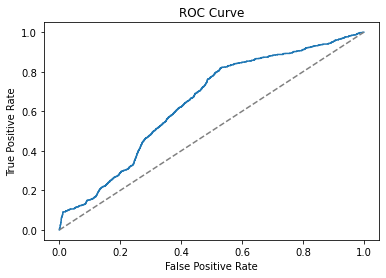

AUC: 0.6447087138451317


In [22]:


# Fit the SVM classifier
svm = SVC(probability=True)
svm.fit(X_tr, y_tr_binary)

# Obtain predicted probabilities
probs = svm.predict_proba(X_te)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_te_binary, probs)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_te_binary, probs)
print('AUC:', auc)


##### 2. Linaer Kernel ( a newer one is shown at the end of the code)

In [ ]:
# Fit the SVM classifier
svm_l = SVC(probability=True, kernel = 'linear')
svm_l.fit(X_tr, y_tr_binary)

# Obtain predicted probabilities
probs_l = svm_l.predict_proba(X_te)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_te_binary, probs_l)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_te_binary, probs_l)
print('AUC:', auc)

In [ ]:


# Obtain predicted labels
y_pred_l = svm_l.predict(X_te)

# Create confusion matrix
cm = confusion_matrix(y_te_binary, y_pred_l)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


##### 3. Polynomial Kernel

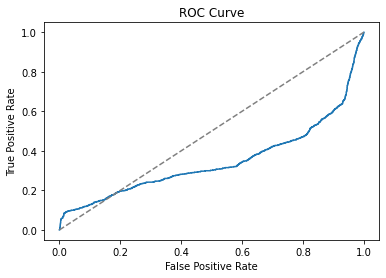

AUC: 0.34793358737950303


In [26]:
# Fit the SVM classifier
svm_p = SVC(probability=True, kernel = 'poly')
svm_p.fit(X_tr, y_tr_binary)

# Obtain predicted probabilities
probs_p = svm_p.predict_proba(X_te)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_te_binary, probs_p)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_te_binary, probs_p)
print('AUC:', auc)

##### 4. Sigmoid Kernel

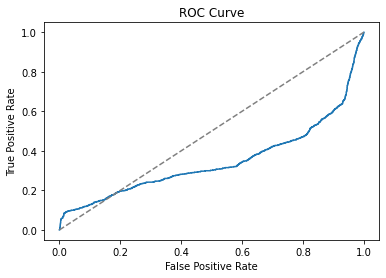

AUC: 0.34793358737950303


In [27]:
# Fit the SVM classifier
svm_s = SVC(probability=True, kernel = 'sigmoid')
svm_s.fit(X_tr, y_tr_binary)

# Obtain predicted probabilities
probs_s = svm_p.predict_proba(X_te)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_te_binary, probs_s)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_te_binary, probs_s)
print('AUC:', auc)

In [ ]:
# Fit the SVM classifier
svm_l = SVC(probability=True, kernel = 'linear', C= 2.0)
svm_l.fit(X_tr, y_tr_binary)

# Obtain predicted probabilities
probs_l = svm_l.predict_proba(X_te)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_te_binary, probs_l)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_te_binary, probs_l)
print('AUC:', auc)

#### Reduced Data
Remove predictors with jobs because jobs are not significant according to logistic regression. We are going to try if removing these can increase accuracy.

In [6]:
col_rm = [col for col in X_tr.columns if 'job' in col]

# Remove the columns
X_tr_filtered = X_tr.drop(columns=col_rm)
X_te_filtered = X_te.drop(columns=col_rm)

NameError: name 'svm_l' is not defined

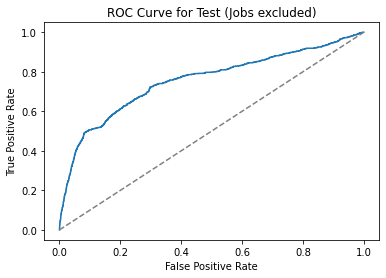

AUC: 0.7549590039144947


In [31]:
# Fit the SVM classifier
svm_l2 = SVC(probability=True, kernel = 'linear')
svm_l2.fit(X_tr_filtered, y_tr_binary)

probs_l2 = svm_l2.predict_proba(X_te_filtered)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_te_binary, probs_l2)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test (Jobs excluded)')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_te_binary, probs_l2)
print('AUC:', auc)

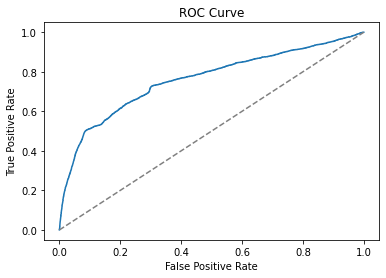

AUC: 0.760102780941901


In [30]:
probs_l2_train = svm_l2.predict_proba(X_tr_filtered)[:, 1]

# Calculate FPR and TPR
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_tr_binary, probs_l2_train)

# Plot ROC curve
plt.plot(fpr_tr, tpr_tr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc_tr = roc_auc_score(y_tr_binary, probs_l2_train)
print('AUC:', auc_tr)

In [33]:
best_threshold_idx_tr = np.argmax(tpr_tr - fpr_tr)
best_threshold_tr = thresholds_tr[best_threshold_idx_tr]
best_threshold_tr

0.04613505541840638

In [37]:
y_hat = np.where(probs_l2_train >= best_threshold_tr, 1, 0)

In [42]:
print(confusion_matrix(y_tr_binary, y_hat))

[[20402  8860]
 [ 1007  2681]]


In [44]:
print(classification_report(y_tr_binary, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     29262
           1       0.23      0.73      0.35      3688

    accuracy                           0.70     32950
   macro avg       0.59      0.71      0.58     32950
weighted avg       0.87      0.70      0.75     32950



In [49]:
p_pred = svm_l2.predict(X_te_filtered)

In [51]:
# accuracy for test data
from sklearn.metrics import accuracy_score
accuracy_score(y_te_binary, p_pred)

0.8866229667394999